### Business Understanding

Stakeholder: Microsoft - the movie-making potential subsidary, presenting to ... 

So what?

- Success = 'popular' movie, captured by IMDB ratings

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# importing ticker to format axes later
import matplotlib.ticker as ticker

In [2]:
!ls data/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      name.basics.tsv.gz
imdb.title.akas.csv.gz       rt.movie_info.tsv.gz
imdb.title.basics.csv.gz     rt.reviews.tsv.gz
imdb.title.crew.csv.gz       tmdb.movies.csv.gz
imdb.title.principals.csv.gz tn.movie_budgets.csv.gz


In [3]:
tbasic = pd.read_csv('data/imdb.title.basics.csv.gz', compression='gzip')

In [4]:
trate = pd.read_csv('data/imdb.title.ratings.csv.gz', compression='gzip')

### Data Exploration

#### IMDB Title Basics Dataset

In [5]:
tbasic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
tbasic.info()
# Note - 146144 total rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [7]:
tbasic.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


#### IMDB Title Ratings Dataset

In [8]:
trate.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
trate.info()
# Note - 73856 total rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
trate.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


#### Merging

In [11]:
# Merging my two datasets based on the imdb unique identifier
imdb = pd.merge(tbasic, trate, on='tconst')

In [12]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
imdb.info()
# Now 73856 rows - can assume all entries in trate were in tbasic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [14]:
# Exploring numeric columns
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [15]:
# Exploring non-numeric columns
imdb[['tconst','primary_title', 'original_title', 'genres']].describe()

,tconst,primary_title,original_title,genres
count,73856,73856,73856,73052
unique,73856,69993,71097,923
top,tt1876227,The Return,Lucky,Drama
freq,1,11,9,11612


In [16]:
imdb.duplicated(subset=['tconst']).sum()

0

**Observations:**

- Now only have movies since 2010
- Have some nulls, in runtime_minutes and genres
- runtime_minutes is slightly skewed, with a larger mean than median
- Says I have 923 unique genres - guessing 923 unique combinations
- No duplicate unique identifiers, so any movies with the same name (like 'The Return', the most frequent name in the primary_title column) are likely different movies
- There are a few extreme outliers to explore:
    - 2115 as the last year the start_year column, which hasn't happened yet
    - 3 - 51,420 is the range on runtime_minutes: 3 seems too short for a movie, 51,420 seems absurdly high

### Data Cleaning

In [17]:
imdb.isna().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

Nulls in my 'genres' and 'runtime' columns may be an issue, especially since my first question relates to genres.

Will fill nulls with a 'nonsense' value, not found in my dataset, so I can still identify nulls at a later date if necessary:

- 'genres' : 'Unknown'
- 'runtime_minutes' : 0

In [18]:
imdb['genres'] = imdb['genres'].fillna('Unknown')
imdb['runtime_minutes'] = imdb['runtime_minutes'].fillna(0)

In [19]:
# Checking my work
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    73856 non-null float64
genres             73856 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [20]:
# Did change the skew in this column, artificially
imdb['runtime_minutes'].describe()

count    73856.000000
mean        84.888228
std        199.608940
min          0.000000
25%         75.000000
50%         90.000000
75%        101.000000
max      51420.000000
Name: runtime_minutes, dtype: float64

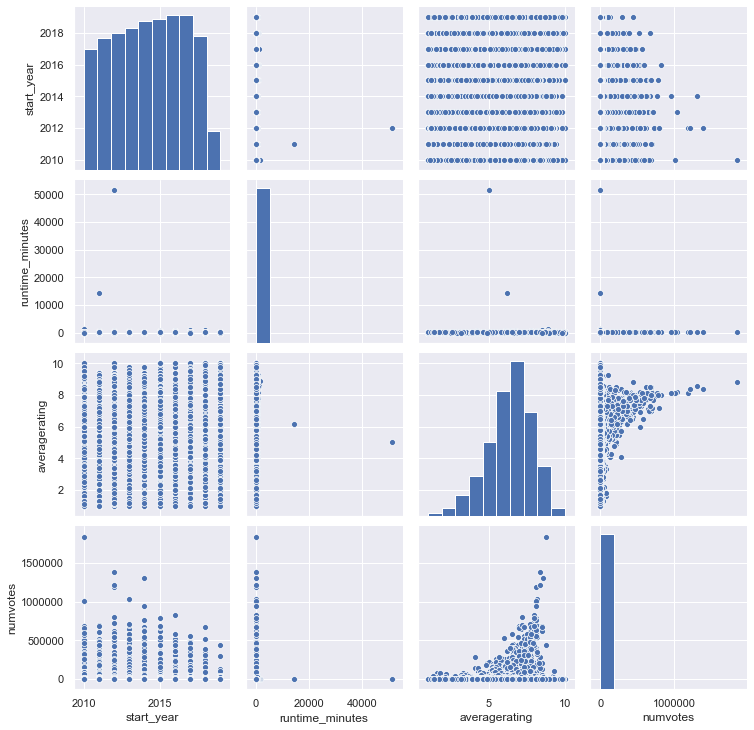

In [21]:
# Further exploration of numeric columns
sns.pairplot(imdb)

#### Expanding Genres Column

In [22]:
# grabbing the genres column
genres_col = imdb['genres'].str.split(',')

In [23]:
genres_col

0          [Action, Crime, Drama]
1              [Biography, Drama]
2                         [Drama]
3                 [Comedy, Drama]
4        [Comedy, Drama, Fantasy]
                   ...           
73851               [Documentary]
73852             [Drama, Family]
73853               [Documentary]
73854                   [Unknown]
73855               [Documentary]
Name: genres, Length: 73856, dtype: object

In [24]:
# arriving at an overall list of all possible genres in this df
genres_list = []
for row in genres_col:
    for item in row:
        genres_list.append(item)
        
genres_list = sorted(list(set(genres_list)))

In [25]:
genres_list

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'Unknown',
 'War',
 'Western']

In [26]:
# creating a new df to use, basedd on the genres column
genres_df = pd.DataFrame(genres_col)

In [27]:
genres_df.head()

,genres
0,"[Action, Crime, Drama]"
1,"[Biography, Drama]"
2,[Drama]
3,"[Comedy, Drama]"
4,"[Comedy, Drama, Fantasy]"


In [28]:
# creating new columns for each genre, that all start out as zeros
for col in genres_list:
    genres_df[col] = 0

In [29]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,"[Action, Crime, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# checking how to asses whether a genre is in a cell
'Drama' in genres_df['genres'][4]

True

In [31]:
# a complicated set of for loops

# first, let's get out the row/index number for each row in the df
for row in genres_df.index:
    # then looking at each genre individually
    for genre in genres_list:
        # if that genre is in the cell for that row at the genres column...
        if genre in genres_df['genres'][row]:
            # then change the original 0 to be a 1
            genres_df[genre][row] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
genres_df.head()

,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,"[Action, Crime, Drama]",1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,"[Biography, Drama]",0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,[Drama],0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[Comedy, Drama]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"[Comedy, Drama, Fantasy]",0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# merging back into imdb
print(len(genres_df.index))
print(len(imdb.index))

73856
73856


In [34]:
sum(genres_df.index == imdb.index)

73856

In [35]:
imdb = pd.concat([imdb, genres_df[genres_list]], axis=1)

In [36]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 35 columns):
tconst             73856 non-null object
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    73856 non-null float64
genres             73856 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
Action             73856 non-null int64
Adult              73856 non-null int64
Adventure          73856 non-null int64
Animation          73856 non-null int64
Biography          73856 non-null int64
Comedy             73856 non-null int64
Crime              73856 non-null int64
Documentary        73856 non-null int64
Drama              73856 non-null int64
Family             73856 non-null int64
Fantasy            73856 non-null int64
Game-Show          73856 non-null int64
History            73856 non-null int64
Horror             73856 non-null int64
Mus

### Are Certain Genres More Popular?

In [37]:
genre_sum_dict = {}
for genre in genres_list:
    genre_sum_dict[genre] = imdb[genre].sum()

In [38]:
genre_sum_dict

{'Action': 6988,
 'Adult': 3,
 'Adventure': 3817,
 'Animation': 1743,
 'Biography': 3809,
 'Comedy': 17290,
 'Crime': 4611,
 'Documentary': 17753,
 'Drama': 30788,
 'Family': 3412,
 'Fantasy': 2126,
 'Game-Show': 2,
 'History': 2825,
 'Horror': 7674,
 'Music': 1968,
 'Musical': 721,
 'Mystery': 3039,
 'News': 579,
 'Reality-TV': 17,
 'Romance': 6589,
 'Sci-Fi': 2206,
 'Short': 1,
 'Sport': 1179,
 'Thriller': 8217,
 'Unknown': 804,
 'War': 853,
 'Western': 280}

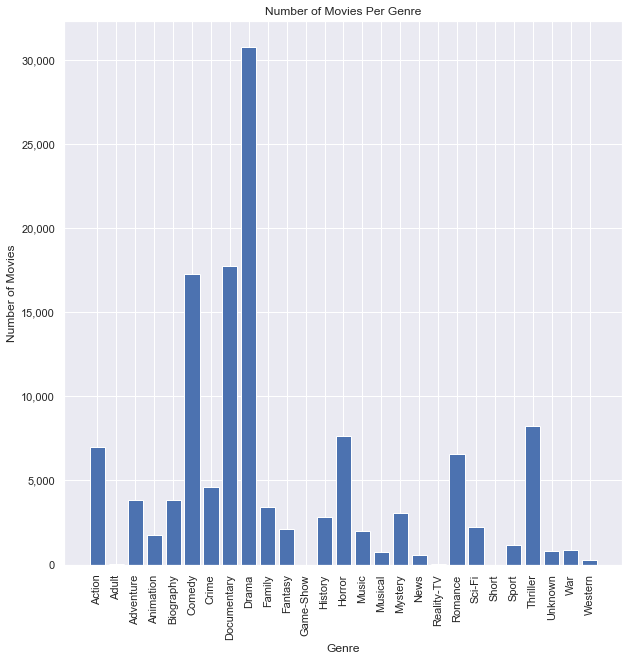

In [39]:
plt.figure(figsize = (10, 10))
plt.bar(genre_sum_dict.keys(), genre_sum_dict.values())

# using this line to format the yaxis with commas
# note that I imported matplotlib.ticker as ticker at the top of the notebook
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# using this line to rotate the xaxis for legibility
plt.xticks(rotation=90)

plt.title('Number of Movies Per Genre')
plt.ylabel("Number of Movies")
plt.xlabel("Genre")

plt.show()

In [40]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,1,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
imdb['numvotes'].describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [42]:
imdb.loc[imdb['numvotes'] < 15]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,0.0,"Comedy,Drama",6.1,13,0,0,...,0,0,0,0,0,0,0,0,0,0
11,tt0170651,T.G.M. - osvoboditel,T.G.M. - osvoboditel,2018,60.0,Documentary,7.5,6,0,0,...,0,0,0,0,0,0,0,0,0,0
14,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8,0,0,...,0,0,0,0,0,0,0,0,0,0
15,tt0247643,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,"Drama,Mystery",4.0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
18,tt0253093,Gangavataran,Gangavataran,2018,134.0,Unknown,6.6,8,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,0,0,...,0,0,0,0,0,0,0,0,0,0
73853,tt9914642,Albatross,Albatross,2017,0.0,Documentary,8.5,8,0,0,...,0,0,0,0,0,0,0,0,0,0
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,0.0,Unknown,6.6,5,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
19172 / len(imdb)

0.2595862218370884

In [44]:
imdb['numvotes'].std()

30294.02297110745

In [45]:
imdb['numvotes'].mean()

3523.6621669194105

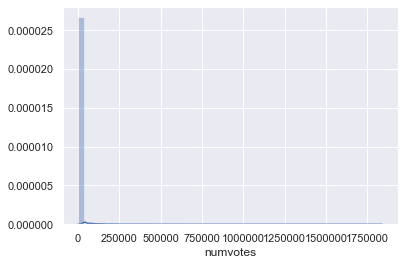

In [46]:
sns.distplot(imdb['numvotes'])

In [47]:
imdb.loc[imdb['numvotes'] == imdb['numvotes'].max()]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
2387,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,1,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# movies with enough votes
imdb_ev = imdb.loc[imdb['numvotes'] >= 15]

In [49]:
imdb_ev.describe()

,start_year,runtime_minutes,averagerating,numvotes,Action,Adult,Adventure,Animation,Biography,Comedy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
count,54684.000000,54684.000000,54684.000000,5.468400e+04,54684.000000,54684.000000,54684.000000,54684.000000,54684.000000,54684.000000,...,54684.000000,54684.000000,54684.000000,54684.000000,54684.0,54684.000000,54684.000000,54684.000000,54684.000000,54684.000000
mean,2014.289353,90.752652,6.159535,4.756011e+03,0.106302,0.000037,0.056269,0.026278,0.049356,0.260808,...,0.006090,0.000183,0.100486,0.033044,0.0,0.016476,0.125393,0.005559,0.012033,0.004133
std,2.605731,230.396238,1.433244,3.512314e+04,0.308226,0.006048,0.230442,0.159963,0.216613,0.439079,...,0.077798,0.013522,0.300650,0.178754,0.0,0.127300,0.331167,0.074353,0.109033,0.064155
min,2010.000000,0.000000,1.000000,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,81.000000,5.300000,3.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,91.000000,6.300000,1.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,104.000000,7.100000,5.130000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,51420.000000,10.000000,1.841066e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
imdb_ev.loc[imdb_ev['averagerating'] == 10]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,Unknown,War,Western
73616,tt9715646,Renegade,Renegade,2019,0.0,Documentary,10.0,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# new trick!
# easiest way to add a new column based on a condition - np.where
# takes 3 arguments: the condition, the value if true, and the value if false

imdb_ev['popular'] = np.where(imdb_ev['averagerating'] > 7.5, 1, 0)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
# creating a new dictionary for further exploration
more_genre_details = {}

for genre in genres_list:
    genre_df = imdb_ev.loc[imdb_ev[genre] == 1]
    genre_pop = genre_df['popular'].sum()
    genre_unpop = len(genre_df) - genre_pop
    pop_perc = genre_df['popular'].mean()
    unpop_perc = 1 - pop_perc
    more_genre_details[genre] = {'Popular': genre_pop, 
                                 'Unpopular': genre_unpop, 
                                 'Total': len(genre_df),
                                 'Popular Percentage': pop_perc,
                                 'Unpopular Percentage': unpop_perc}

In [53]:
# Creating a dataframe from that dictionary
# Using .T (transpose) so it renders nicer in my opinion
genre_details = pd.DataFrame(more_genre_details).T

In [54]:
# dropping genres with 10 or fewer movies
too_few = [genre for genre in genre_details.index if genre_details['Total'][genre] <= 10]

genre_details = genre_details.drop(index = too_few)

In [55]:
genre_details.reset_index()

,index,Popular,Unpopular,Total,Popular Percentage,Unpopular Percentage
0,Action,556.0,5257.0,5813.0,0.095648,0.904352
1,Adventure,446.0,2631.0,3077.0,0.144946,0.855054
2,Animation,209.0,1228.0,1437.0,0.145442,0.854558
3,Biography,789.0,1910.0,2699.0,0.292330,0.707670
4,Comedy,1276.0,12986.0,14262.0,0.089469,0.910531
5,Crime,397.0,3465.0,3862.0,0.102796,0.897204
6,Documentary,3979.0,6376.0,10355.0,0.384259,0.615741
7,Drama,3160.0,21095.0,24255.0,0.130282,0.869718
8,Family,412.0,2198.0,2610.0,0.157854,0.842146
9,Fantasy,138.0,1560.0,1698.0,0.081272,0.918728


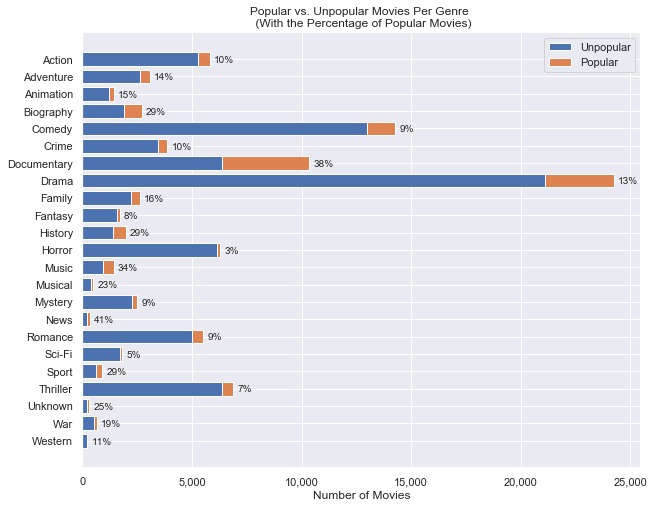

In [57]:
plt.figure(figsize=(10,8))

# stacked horizonal bar charts
plt.barh(genre_details.index, genre_details['Unpopular'], label='Unpopular')
plt.barh(genre_details.index, genre_details['Popular'], 
         # here, left shows where the stack of the next part begins
         left = genre_details['Unpopular'], label='Popular')

# grabbing the current axis to format and annotate later
ax = plt.gca()

#inverting y axis so it shows in alphabetical order
ax.invert_yaxis()

# using this line to format the yaxis with commas
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# This tricky bit of code annotates percentages on the chart
y = 0.2 # our start point on our y axis for the details
# Doing this for each genre
for row in genre_details.index:
    # grabbing the total for that genre
    x = genre_details['Total'][row]
    # grabbing the percentage of popular movies for that genre
    pop_perc = genre_details['Popular Percentage'][row]
    # formatting with f-strings for readability
    percentage = f'{pop_perc * 100:,.0f}%' 
    # annotating the chart, locating the annotation at total + 200 and our y height
    ax.annotate(percentage,(x + 200, y))
    # adding 1 to our y for the next genre
    y += 1

plt.title("Popular vs. Unpopular Movies Per Genre \n (With the Percentage of Popular Movies)")
plt.xlabel("Number of Movies")
plt.legend()
plt.show()

So what?

Comedies, Documentaries and Dramas have a lot of popular movies, in terms of pure numbers

But News, Documentaries and Music have a lot of popular movies, in terms of percentages